# Introducción a la Probabilidad y Estadística
En este cuaderno, exploraremos algunos de los conceptos que hemos discutido anteriormente. Muchos conceptos de probabilidad y estadística están bien representados en las principales bibliotecas para el procesamiento de datos en Python, como `numpy` y `pandas`.


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variables Aleatorias y Distribuciones
Comencemos extrayendo una muestra de 30 valores de una distribución uniforme de 0 a 9. También calcularemos la media y la varianza.


In [2]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [4, 6, 5, 2, 2, 0, 2, 5, 3, 9, 5, 1, 3, 7, 9, 3, 8, 6, 8, 8, 2, 2, 3, 10, 7, 6, 2, 6, 4, 0]
Mean = 4.6
Variance = 7.640000000000001


Para estimar visualmente cuántos valores diferentes hay en la muestra, podemos graficar el **histograma**:


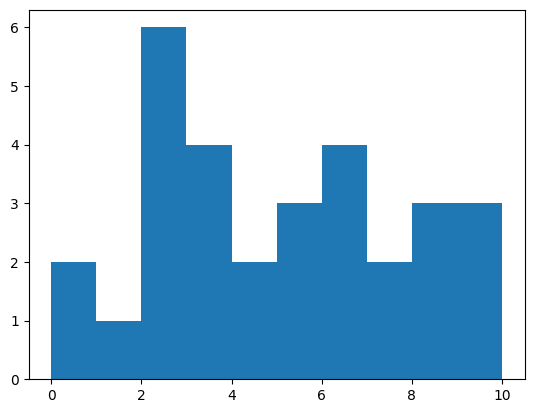

In [5]:
plt.hist(sample)
plt.show()

## Analizando Datos Reales

La media y la varianza son muy importantes al analizar datos del mundo real. Vamos a cargar los datos sobre jugadores de béisbol desde [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [2]:
df = pd.read_csv("D:\RNG\PersonalCodes\Data-Science-For-Beginners\data\SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\PTEE.Monitoreo\AppData\Local\Temp\ipykernel_22796\710854900.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("D:\RNG\PersonalCodes\Data-Science-For-Beginners\data\SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])


,Name,Team,Role,Weight,Height,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


Estamos utilizando un paquete llamado [**Pandas**](https://pandas.pydata.org/) aquí para el análisis de datos. Hablaremos más sobre Pandas y cómo trabajar con datos en Python más adelante en este curso.

Calculemos los valores promedio para edad, altura y peso:


In [4]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.689255
Weight     73.697292
dtype: float64

Ahora centrémonos en la altura y calculemos la desviación estándar y la varianza:


In [6]:
print(list(df['Height'])[:20])

[180.0, 215.0, 210.0, 210.0, 188.0, 176.0, 209.0, 200.0, 231.0, 180.0, 188.0, 180.0, 185.0, 160.0, 180.0, 185.0, 197.0, 189.0, 185.0, 219.0]


In [7]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.6892545982575
Variance = 440.64268481205494
Standard Deviation = 20.99149077154967


Además de la media, tiene sentido observar el valor mediano y los cuartiles. Se pueden visualizar utilizando un **diagrama de caja**:


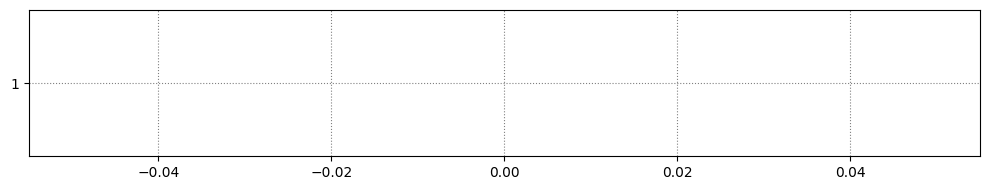

In [8]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

También podemos hacer diagramas de caja de subconjuntos de nuestro conjunto de datos, por ejemplo, agrupados por el rol del jugador.


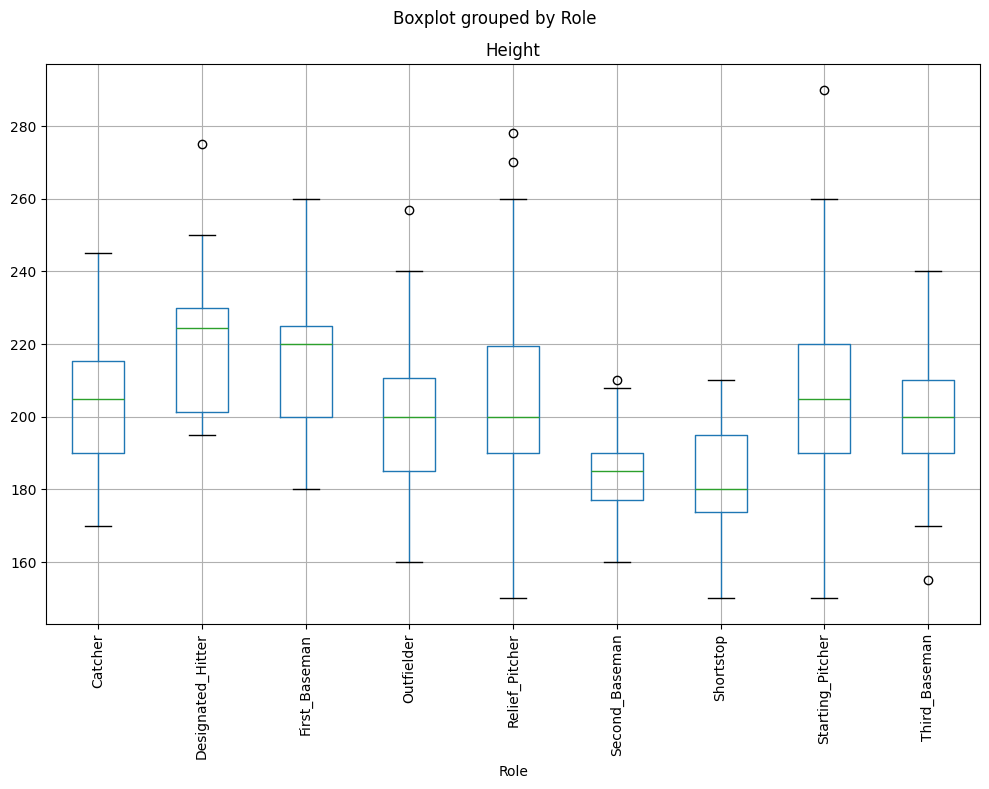

In [9]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Nota**: Este diagrama sugiere que, en promedio, las alturas de los primera base son mayores que las alturas de los segunda base. Más adelante aprenderemos cómo podemos probar esta hipótesis de manera más formal y cómo demostrar que nuestros datos son estadísticamente significativos para respaldar esta afirmación.

La edad, la altura y el peso son todas variables aleatorias continuas. ¿Qué crees que podría ser su distribución? Una buena manera de averiguarlo es trazando el histograma de los valores:


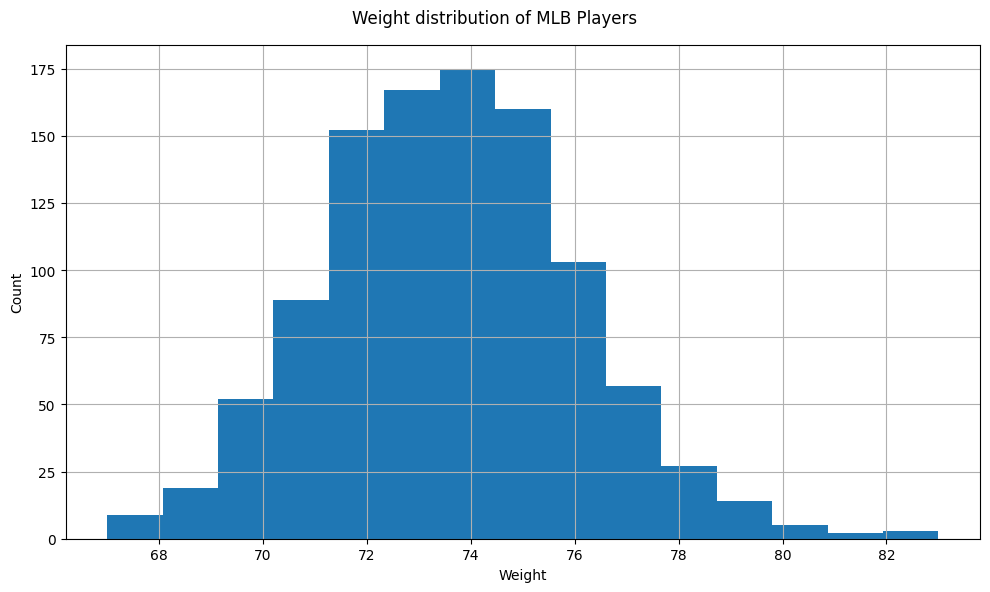

In [10]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribución Normal

Vamos a crear una muestra artificial de pesos que siga una distribución normal con la misma media y varianza que nuestros datos reales:


In [14]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([161.49742822, 210.443407  , 218.9406533 , 211.83872596,
       203.74168504, 193.44962136, 244.01145689, 214.70103455,
       191.71914525, 196.32463263, 192.09110322, 226.28941753,
       136.57176368, 233.54945952, 246.75753359, 184.36141892,
       256.50086728, 186.00070015, 174.25601669, 230.78025533])

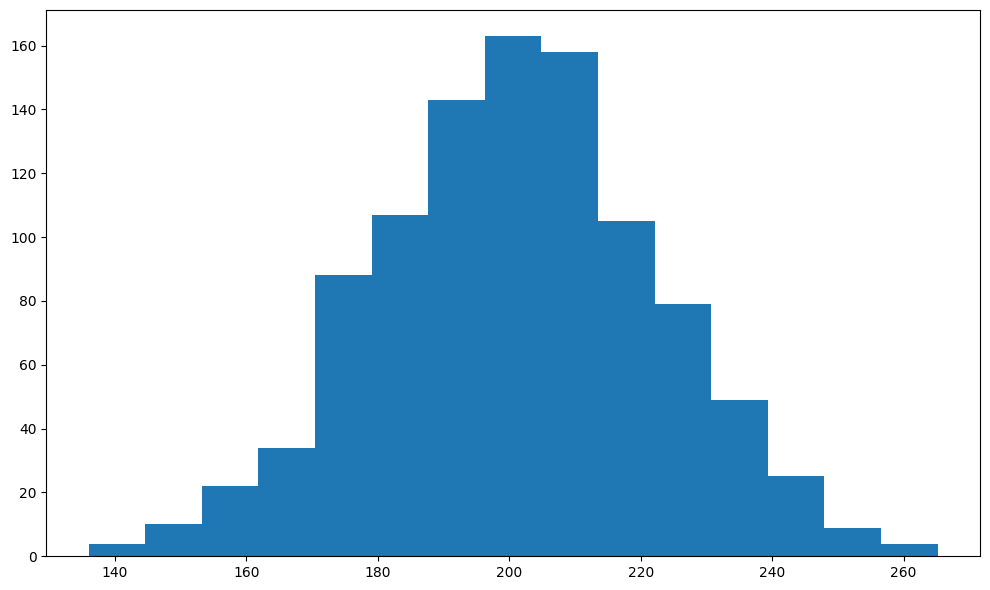

In [15]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

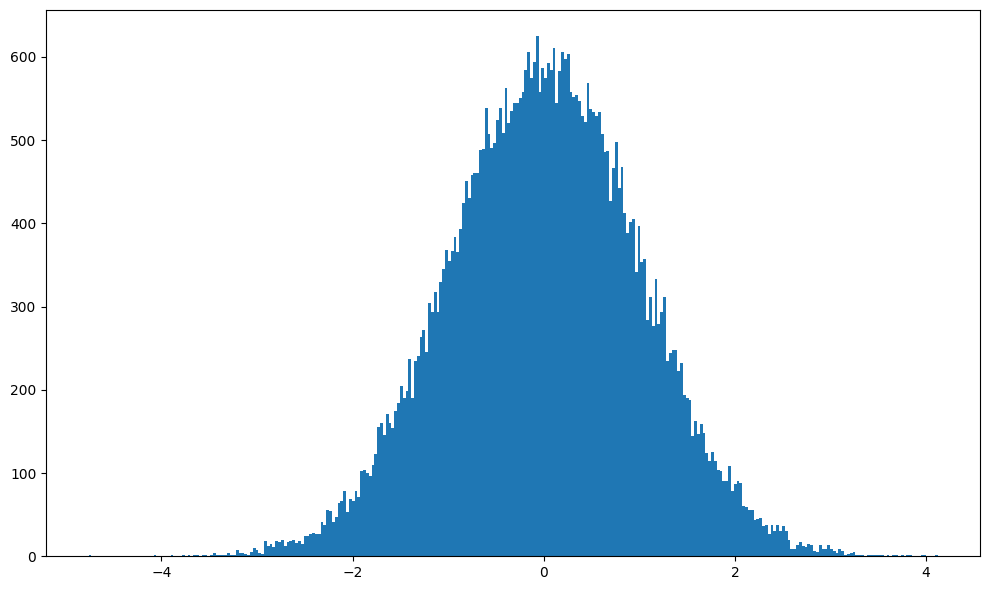

In [12]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Dado que la mayoría de los valores en la vida real están distribuidos normalmente, no deberíamos usar un generador de números aleatorios uniformes para generar datos de muestra. Esto es lo que sucede si intentamos generar pesos con una distribución uniforme (generada por `np.random.rand`):


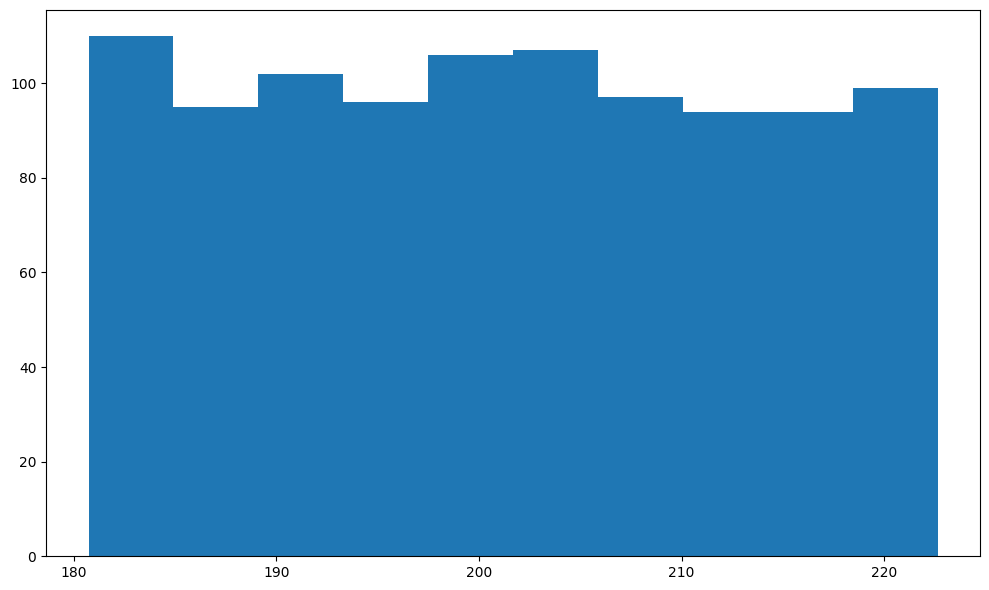

In [11]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervalos de Confianza

Ahora calculemos los intervalos de confianza para los pesos y alturas de los jugadores de béisbol. Usaremos el código [de esta discusión en stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [9]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].ffill())
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.14
p=0.90, mean = 73.70 ± 0.14
p=0.95, mean = 73.70 ± 0.14


## Pruebas de Hipótesis

Exploremos los diferentes roles en nuestro conjunto de datos de jugadores de béisbol:


In [7]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Weight,Height,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


In [10]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Podemos observar que los intervalos no se superponen.

Una forma estadísticamente más correcta de probar la hipótesis es utilizar una **prueba t de Student**:


In [19]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Los dos valores que devuelve la función `ttest_ind` son:
* El p-value puede considerarse como la probabilidad de que dos distribuciones tengan la misma media. En nuestro caso, es muy bajo, lo que significa que hay una fuerte evidencia que respalda que los primera base son más altos.
* El t-value es el valor intermedio de la diferencia de medias normalizada que se utiliza en la prueba t, y se compara con un valor umbral para un nivel de confianza dado.


## Simulando una Distribución Normal con el Teorema del Límite Central

El generador pseudoaleatorio en Python está diseñado para proporcionarnos una distribución uniforme. Si queremos crear un generador para una distribución normal, podemos utilizar el teorema del límite central. Para obtener un valor con distribución normal, simplemente calcularemos la media de una muestra generada uniformemente.


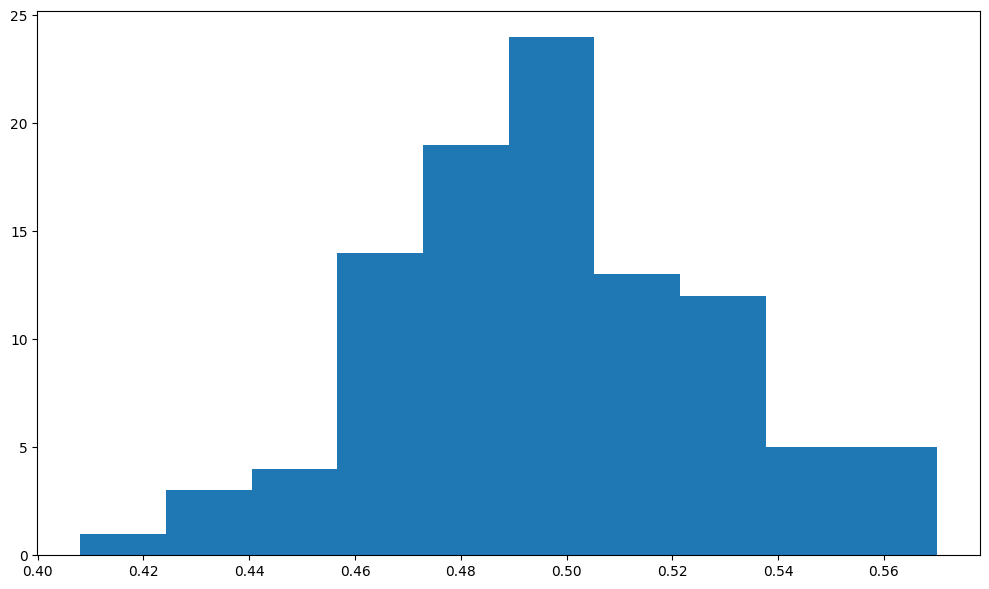

In [20]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlación y la Malvada Corporación de Béisbol

La correlación nos permite encontrar relaciones entre secuencias de datos. En nuestro ejemplo ficticio, imaginemos que existe una malvada corporación de béisbol que paga a sus jugadores según su altura: cuanto más alto sea el jugador, más dinero recibe. Supongamos que hay un salario base de $1000 y un bono adicional de entre $0 y $100, dependiendo de la altura. Tomaremos a los jugadores reales de la MLB y calcularemos sus salarios imaginarios:


In [22]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180.0, 1033.9709509454644), (215.0, 1073.6037270485065), (210.0, 1067.941901890929), (210.0, 1067.941901890929), (188.0, 1043.0298711975884), (176.0, 1029.4414908194026), (209.0, 1066.8095368594136), (200.0, 1056.6182515757741), (231.0, 1091.721567552754), (180.0, 1033.9709509454644)]


Ahora calculemos la covarianza y la correlación de esas secuencias. `np.cov` nos dará una llamada **matriz de covarianza**, que es una extensión de la covarianza a múltiples variables. El elemento $M_{ij}$ de la matriz de covarianza $M$ es una correlación entre las variables de entrada $X_i$ y $X_j$, y los valores diagonales $M_{ii}$ son la varianza de $X_{i}$. De manera similar, `np.corrcoef` nos dará la **matriz de correlación**.


In [26]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[nan nan]
 [nan nan]]
Covariance = nan
Correlation = nan


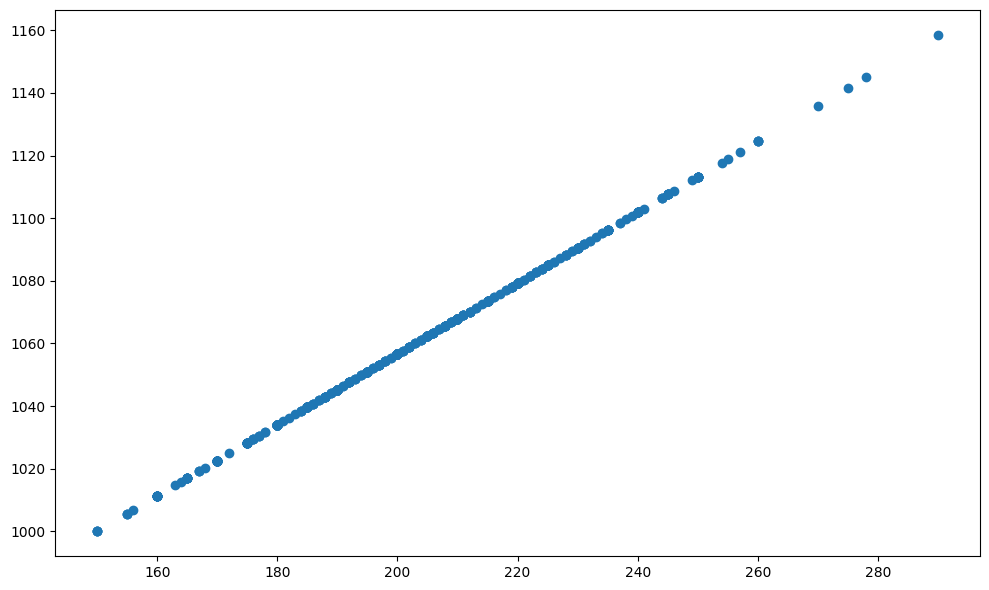

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [27]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = nan


En este caso, la correlación es ligeramente menor, pero sigue siendo bastante alta. Ahora, para hacer que la relación sea aún menos obvia, podríamos querer agregar algo de aleatoriedad adicional añadiendo alguna variable aleatoria al salario. Veamos qué sucede:


In [30]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = nan


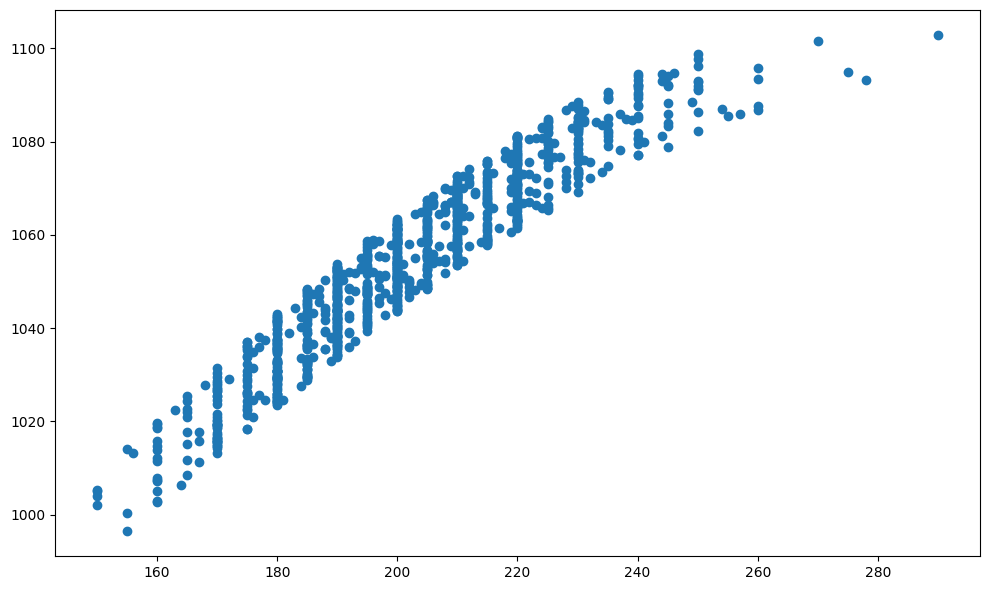

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> ¿Puedes adivinar por qué los puntos se alinean en líneas verticales de esta manera?

Hemos observado la correlación entre un concepto artificialmente diseñado como el salario y la variable observada *altura*. Ahora veamos si las dos variables observadas, como la altura y el peso, también están correlacionadas:


In [11]:
np.corrcoef(df['Height'],df['Weight'])

array([[nan, nan],
       [nan,  1.]])

Desafortunadamente, no obtuvimos ningún resultado, solo algunos valores extraños `nan`. Esto se debe a que algunos de los valores en nuestra serie están indefinidos, representados como `nan`, lo que provoca que el resultado de la operación también sea indefinido. Al observar la matriz, podemos ver que la columna problemática es `Weight`, porque se ha calculado la autocorrelación entre los valores de `Height`.

> Este ejemplo muestra la importancia de la **preparación** y **limpieza** de datos. Sin datos adecuados, no podemos calcular nada.

Usemos el método `fillna` para rellenar los valores faltantes y calcular la correlación:


In [12]:
np.corrcoef(df['Height'],df['Weight'].fillna(0))

array([[nan, nan],
       [nan,  1.]])

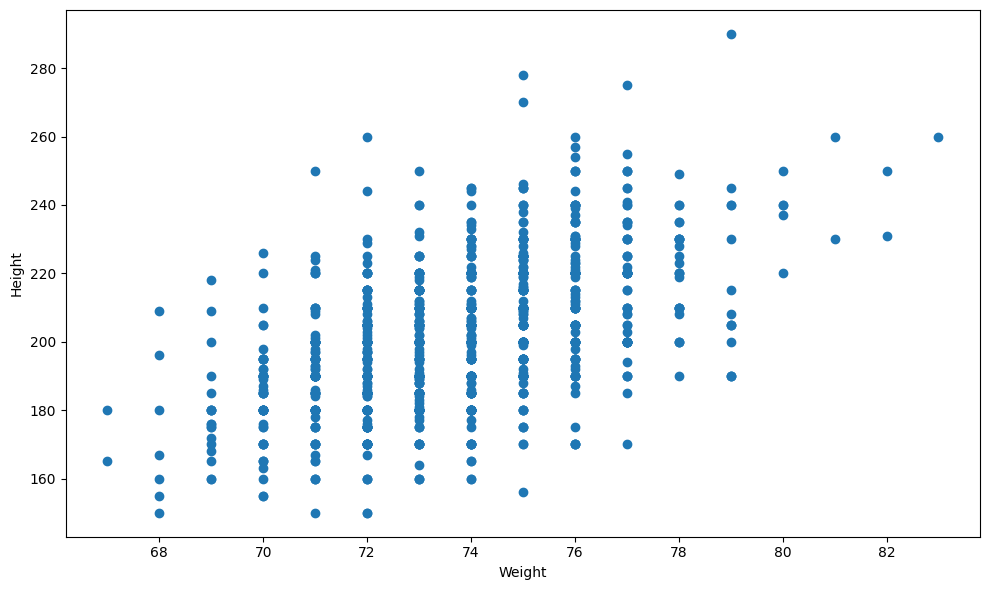

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Conclusión

En este cuaderno hemos aprendido cómo realizar operaciones básicas en datos para calcular funciones estadísticas. Ahora sabemos cómo utilizar un sólido conjunto de herramientas matemáticas y estadísticas para probar algunas hipótesis y cómo calcular intervalos de confianza para variables arbitrarias a partir de una muestra de datos.



---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Si bien nos esforzamos por lograr precisión, tenga en cuenta que las traducciones automáticas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
